In [450]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

train=pd.read_csv("/Users/User/Desktop/ML0000/python/6/Train_Loan_Home.csv")
test=pd.read_csv("/Users/User/Desktop/ML0000/python/6/Test_Loan_Home.csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [451]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [452]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [453]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


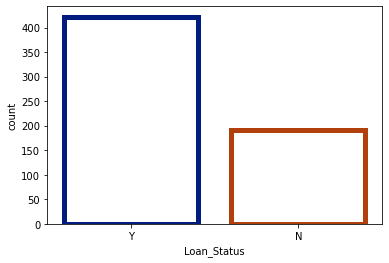

In [454]:
ax = sns.countplot(x="Loan_Status", data=train,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))

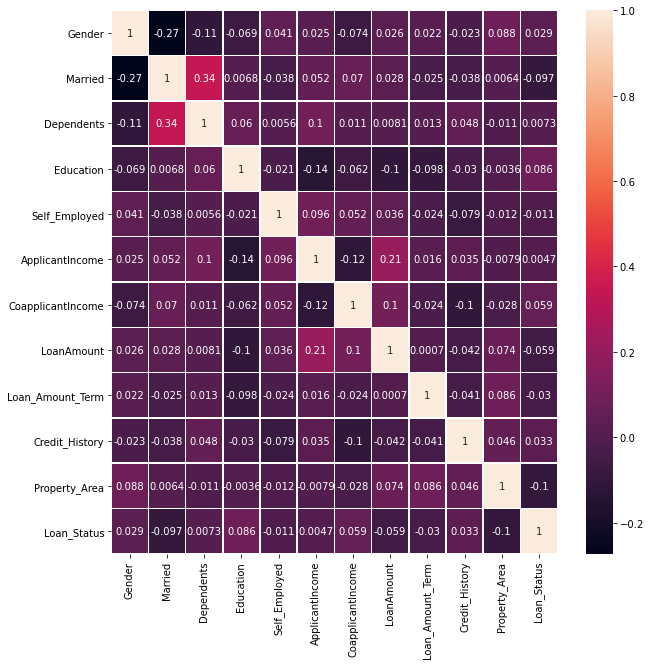

In [455]:
cols=['Gender','Married','Dependents','Education','Self_Employed','Property_Area',"Loan_Status"]
train=train.fillna(-1000)
for k in cols:
    els=list(train[k].unique())
    b=0
    for s in els :
        train[k]=train[k].replace(s,b)
        b=b+1

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(train.corr(), annot=True, linewidths=.5, ax=ax)


In [456]:

from sklearn.cluster import KMeans
from sklearn import preprocessing,svm,neighbors
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
train.drop(["Loan_ID"],1,inplace=True)
train=train[["Credit_History","Property_Area","Dependents","Loan_Amount_Term","Loan_Status"]]
X=train.drop(["Loan_Status"],1)
y=train["Loan_Status"]

In [459]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=0)
#lnr=LinearRegression()
lr=LogisticRegression()
knn=neighbors.KNeighborsClassifier(n_neighbors = 9) 
svm0=svm.SVC(random_state = 1)
nb=GaussianNB()
dtc = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)

#lnr.fit(X_train,y_train)
lr.fit(X_train,y_train)
knn.fit(X_train,y_train)
svm0.fit(X_train,y_train)
nb.fit(X_train,y_train)
dtc.fit(X_train,y_train)
rf.fit(X_train,y_train)

accuracy={}
#accuracy["LinearRegression"]=lnr.score(X_test,y_test)*100
accuracy["Logisticregression"]=lr.score(X_test,y_test)*100
accuracy["Knn"]=knn.score(X_test,y_test)*100
accuracy["SVM"]=svm0.score(X_test,y_test)*100
accuracy["Naive Bayes"]=nb.score(X_test,y_test)*100
accuracy["Random Forest"]=rf.score(X_test,y_test)*100
print(accuracy)


{'Logisticregression': 73.17073170731707, 'Knn': 81.30081300813008, 'SVM': 73.17073170731707, 'Naive Bayes': 72.35772357723577, 'Random Forest': 84.5528455284553}


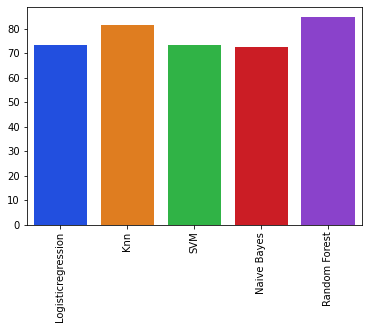

In [460]:
p=sns.barplot(list(accuracy.keys()),list(accuracy.values()),palette="bright")
_=plt.setp(p.get_xticklabels(),rotation=90)
plt.show()